# Ensamble Learning

Dataset Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

def generate_moons_dataset(n_samples=100, noise=0.1, test_size=0.2):
    '''Generates a synthetic dataset of two interleaving half circles (moons).'''
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def plotData(X, y, cmap=plt.cm.coolwarm, edgecolors='k'):
    '''Plots the dataset.'''
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors=edgecolors)

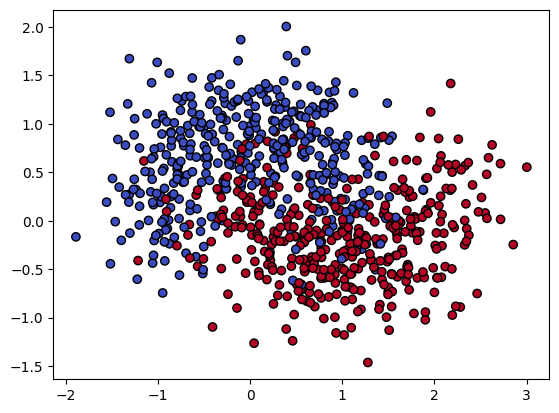

In [3]:
X_train, X_test, y_train, y_test = generate_moons_dataset(n_samples=1000, noise=0.4)
plotData(X_train, y_train)

Hard Voting

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()

voting_clf = VotingClassifier(estimators=[
    ('log_clf', log_clf),
    ('rf_clf', rf_clf),
    ('svc_clf', svc_clf)
    ], 
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression()),
                             ('rf_clf', RandomForestClassifier()),
                             ('svc_clf', SVC())])

In [5]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rf_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} accuracy: {accuracy:.5f}")

LogisticRegression accuracy: 0.82000
RandomForestClassifier accuracy: 0.83500
SVC accuracy: 0.85500
VotingClassifier accuracy: 0.86000


In [6]:
# NOTE: The Ensamble classifier may or may not perform better than individual classifiers

Soft voting (Gives more weight to higher confidence predictions)

In [7]:
log_clf_2 = LogisticRegression()
rf_clf_2 = RandomForestClassifier()
svc_clf_2 = SVC(probability=True)
# Using 'probability=True' for SVC to enable soft voting
voting_clf_2 = VotingClassifier(estimators=[
    ('log_clf', log_clf_2),
    ('rf_clf', rf_clf_2),
    ('svc_clf', svc_clf_2)
    ], 
    voting='soft')

for clf in (log_clf_2, rf_clf_2, svc_clf_2, voting_clf_2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} (soft voting) accuracy: {accuracy:.5f}")

LogisticRegression (soft voting) accuracy: 0.82000
RandomForestClassifier (soft voting) accuracy: 0.87000
SVC (soft voting) accuracy: 0.85500
VotingClassifier (soft voting) accuracy: 0.86000


# Bagging and Pasting

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [9]:
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

In [10]:
# Training a single Decision Tree for comparison
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [11]:
print(f"BaggingClassifier accuracy: {accuracy_bagging:.3f}")
print(f"DecisionTreeClassifier accuracy: {accuracy_tree:.3f}")

BaggingClassifier accuracy: 0.850
DecisionTreeClassifier accuracy: 0.775


In [12]:
def plot_decision_boundary(clf, X, y, ax=None):
    X_plot = np.linspace(-1.5, 2.5, 1000)
    X1, X2 = np.meshgrid(X_plot, X_plot)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    y_pred = clf.predict(X_grid)
    y_pred = y_pred.reshape(X1.shape)
    plotData(X, y, cmap=plt.cm.coolwarm)
    if ax is None:
        ax = plt.gca()
    ax.contourf(X1, X2, y_pred, alpha=0.3, cmap=plt.cm.coolwarm)



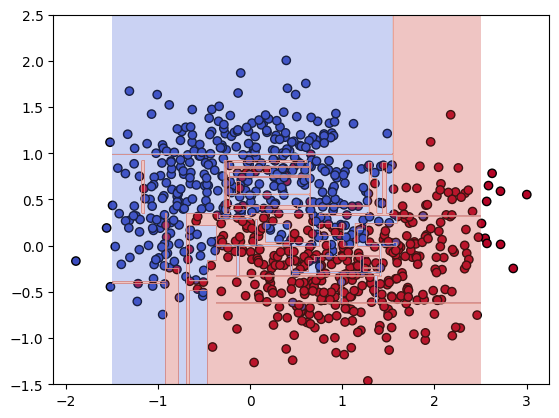

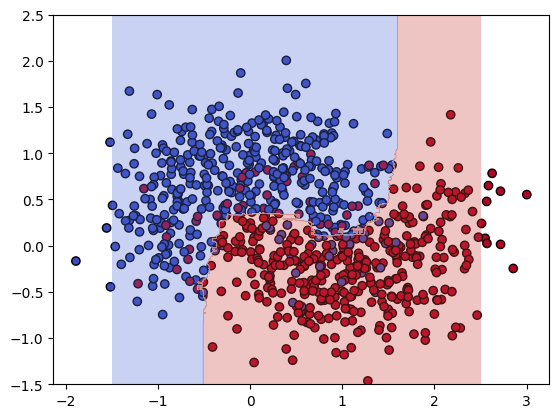

In [13]:
plot_decision_boundary(tree_clf, X_train, y_train)
plt.show()
plot_decision_boundary(bagging_clf, X_train, y_train)
plt.show()


Out Of Bag Evaluation

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=100, n_jobs=-1, oob_score=True)

In [15]:
print(f"OOB Score for the Bagging Classifier: {bag_clf.oob_score_}")

# Accuracy after testing
bag_accuracy = accuracy_score(y_test, bag_clf.predict(X_test))
print(f"Accuracy of the Bagging Classifier on test set: {bag_accuracy}")

OOB Score for the Bagging Classifier: 0.8525
Accuracy of the Bagging Classifier on test set: 0.84


# Random Forest Classifiers

In [16]:
forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, oob_score=True)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       oob_score=True)

In [17]:
y_pred_forest = forest_clf.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)

In [18]:
print(f"Accuracy of the Random Forest: {forest_accuracy}")
print(f"OOB Score for the Random Forest: {forest_clf.oob_score_}")

Accuracy of the Random Forest: 0.85
OOB Score for the Random Forest: 0.8475


In [19]:
# Using Extra Trees for better randomization
from sklearn.ensemble import ExtraTreesClassifier

etree_clf = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_leaf_nodes=16, bootstrap=True, oob_score=True)
etree_clf.fit(X_train, y_train)
etree_accuracy = accuracy_score(y_test, etree_clf.predict(X_test))

In [20]:
print(f"Accuracy of Exteme Random Tree Ensambles: {etree_accuracy}")
print(etree_clf.oob_score_)

Accuracy of Exteme Random Tree Ensambles: 0.845
0.85125


Feature Importance... IRIS DATASET

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10060216825192053
sepal width (cm) 0.02213658245491834
petal length (cm) 0.4384675995164289
petal width (cm) 0.4387936497767323


# Boosting

Ada-Boost (Adaptive Boosting)

In [22]:
# sklearn uses SAMME (Stagewise Additive Modelling using a Multi-class Exponential loss function) for the purpose of implementing Ada-Boost. 
# (If the predictor has a predict_proba function, it uses SAMME.R which is a little more accurate.)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [24]:
ada_accuracy = accuracy_score(y_test, ada_clf.predict(X_test))
print(f"Ada-Boost algorithm accuracy: {ada_accuracy}")

Ada-Boost algorithm accuracy: 0.85


Building a little gradient boost using tree regressors

Gradient Boosting (Manual)

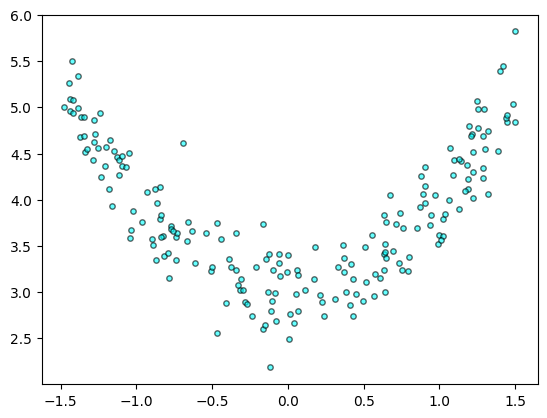

In [25]:
X = 3*(np.random.rand(200, 1) - 0.5)
X.reshape(-1, 1)
y =  X**2 + 3 + np.random.randn(200, 1) * 0.3
plt.scatter(X, y, s=15, c='cyan', alpha=0.6, edgecolors='k')

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg3 = DecisionTreeRegressor(max_depth=2)

tree_reg1.fit(X, y)
y_int1 = y - tree_reg1.predict(X).reshape(-1, 1)
tree_reg2.fit(X, y_int1)
y_int2 = y_int1 - tree_reg2.predict(X).reshape(-1, 1)
tree_reg3.fit(X, y_int2)

DecisionTreeRegressor(max_depth=2)

In [27]:
y_pred = sum(tree.predict(X).reshape(-1, 1) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [28]:
from sklearn.metrics import mean_squared_error
print("MS of first tree alone: ", mean_squared_error(y, tree_reg1.predict(X)))
print("MS error for the first two trees combined: ", mean_squared_error(y, (tree_reg1.predict(X).reshape(-1, 1) + tree_reg2.predict(X).reshape(-1, 1))))
print("MS error for the first three trees combined: ", mean_squared_error(y, (tree_reg1.predict(X).reshape(-1, 1) + tree_reg2.predict(X).reshape(-1, 1) + tree_reg3.predict(X).reshape(-1, 1))))

MS of first tree alone:  0.158607582206726
MS error for the first two trees combined:  0.13072127354000948
MS error for the first three trees combined:  0.0900567433057659


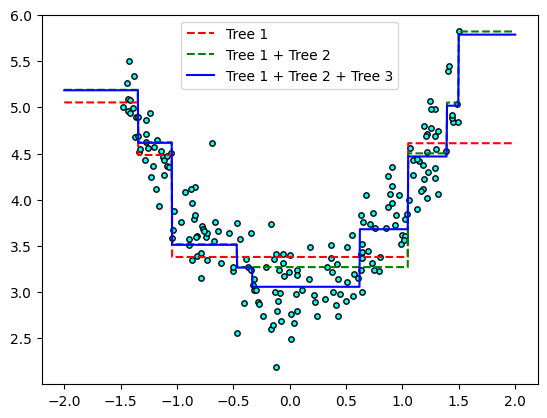

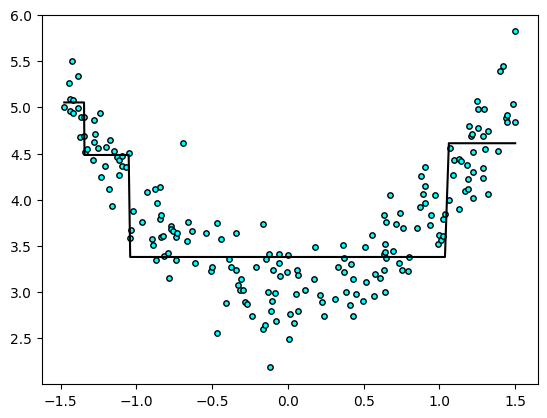

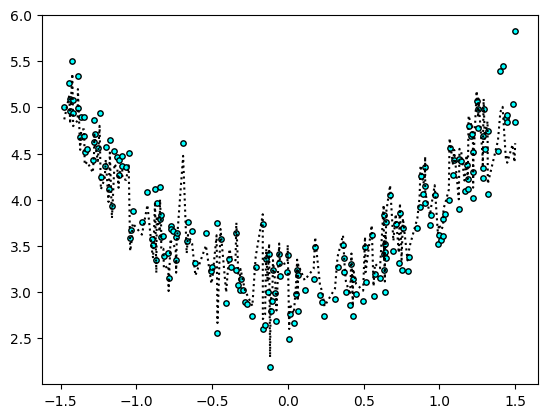

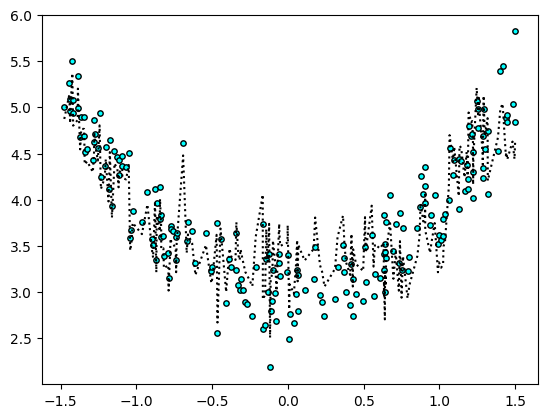

In [29]:
# Plotting decision boundaries
plt.scatter(X[:, 0], y, color='cyan', s=15, edgecolors='k')
X_plot = np.linspace(-2.0, 2.0, 1000).reshape(-1, 1)
plt.plot(X_plot, tree_reg1.predict(X_plot), "r--", label="Tree 1")
plt.plot(X_plot, tree_reg2.predict(X_plot).reshape(-1, 1) + tree_reg1.predict(X_plot).reshape(-1, 1), "g--", label="Tree 1 + Tree 2")
plt.plot(X_plot, tree_reg3.predict(X_plot).reshape(-1, 1) + tree_reg2.predict(X_plot).reshape(-1, 1) + tree_reg1.predict(X_plot).reshape(-1, 1), "b-", label="Tree 1 + Tree 2 + Tree 3")
plt.legend()
plt.show()


data_ = np.c_[X, y]
data_sorted = pd.DataFrame(data_, columns=['X', 'y']).sort_values(by='X')
X_plot_ = data_sorted['X'].values.reshape(-1, 1)
Y_plot_ = data_sorted['y'].values.reshape(-1, 1)

plt.scatter(X_plot_[:, 0], Y_plot_, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, tree_reg1.predict(X_plot_).reshape(-1, 1), "k-", label="Tree 1 Training")
plt.show()
plt.scatter(X_plot_[:, 0], Y_plot_, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, Y_plot_ - tree_reg2.predict(X_plot_).reshape(-1, 1), "k:", label="Tree 3 Training")
plt.show()
plt.scatter(X_plot_[:, 0], Y_plot_, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, Y_plot_ - tree_reg2.predict(X_plot_).reshape(-1, 1) - tree_reg3.predict(X_plot_).reshape(-1, 1), "k:", label="Tree 3 Training")
plt.show()

Gradient Boosting (using sklearn)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(
    learning_rate=1, max_depth=2, n_estimators=3
)
gb_reg.fit(X, y.ravel())

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3)

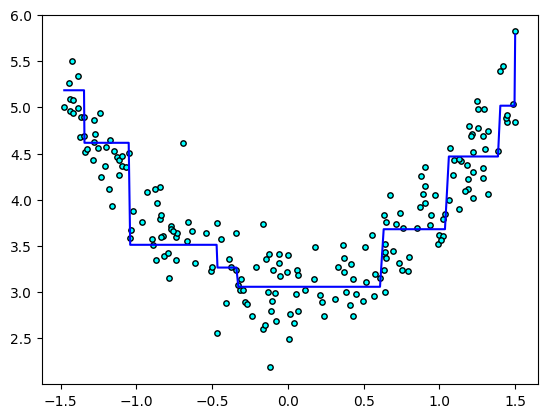

In [31]:
# Plotting decision boundaries
plt.scatter(X, y, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, gb_reg.predict(X_plot_), "b-", label="Gradient Boosting")

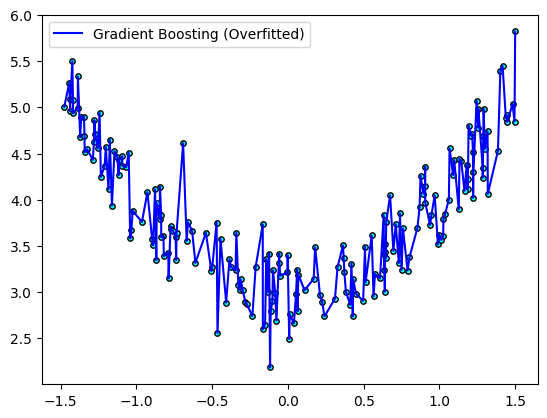

In [32]:
gb_reg_of = GradientBoostingRegressor(
    learning_rate=1, n_estimators=500
)
gb_reg_of.fit(X, y.ravel())
# Plotting decision boundaries
plt.scatter(X, y, color='cyan', s=15, edgecolors='k')
plt.plot(X_plot_, gb_reg_of.predict(X_plot_), "b-", label="Gradient Boosting (Overfitted)")
plt.legend()

Early stopping with gradient boosting and staged_predict()

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

In [42]:
gbrt = GradientBoostingRegressor(
    max_depth=2, n_estimators=120
)
gbrt.fit(X_train, y_train.ravel())
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(
    max_depth=2, n_estimators=best_n_estimators + 1)
gbrt_best.fit(X_train, y_train.ravel())

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(69))

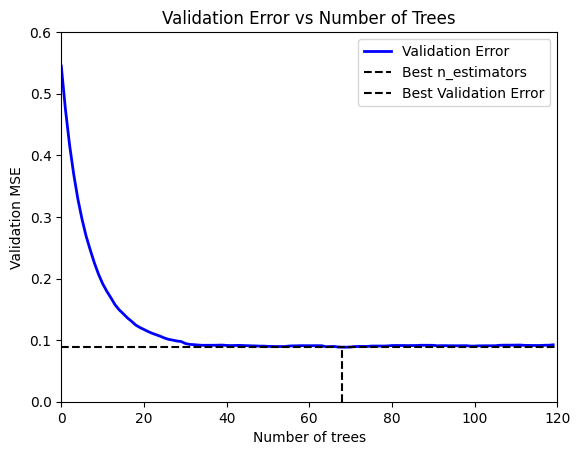

In [57]:
plt.plot(np.arange(len(errors)), errors, "b-", linewidth=2, label="Validation Error")
plt.xlabel("Number of trees")
plt.ylabel("Validation MSE")
plt.axis([0, 120, 0, 0.6])
plt.axvline(best_n_estimators, color='k', ymax=errors[best_n_estimators] / 0.6, linestyle='--', label="Best n_estimators")
plt.axhline(errors[best_n_estimators], color='k', linestyle='--', label="Best Validation Error")
plt.title("Validation Error vs Number of Trees")
plt.legend()

In [61]:
# Implementing Early Stopping by actually stopping ft. warm_start
max_iter = 120

gbrt = GradientBoostingRegressor(
    max_depth=2, warm_start=True
)

best_mse = float("inf")
best_n_estimators = 0
best_gbrt = None
for n_estimators in range(1, max_iter + 1):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train.ravel())
    y_pred = gbrt.predict(X_val)
    val_mse = mean_squared_error(y_val, y_pred)
    if (val_mse < best_mse):
        best_mse = val_mse
        best_n_estimators = n_estimators
        best_gbrt = gbrt
    elif (n_estimators - best_n_estimators > 5):
        break
    
print(f"Best n_estimators: {best_n_estimators}, Best Validation MSE: {best_mse}")

Best n_estimators: 55, Best Validation MSE: 0.08949805233082626


In [71]:
# XGBoost API
# XGBoost is a powerful library for gradient boosting that provides an efficient and flexible implementation.

In [70]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(
    n_estimators=120, max_depth=2,
)
xgb_reg.set_params(early_stopping_rounds=15, eval_metric='rmse', verbosity=0)
xgb_reg.fit(X_train, y_train.ravel(), eval_set=[(X_val, y_val)], verbose=False)
xgb_pred = xgb_reg.predict(X_val)
xgb_mse = mean_squared_error(y_val, xgb_pred)
print(f"XGBoost Validation MSE: {xgb_mse}, Best n_estimators: {xgb_reg.best_iteration}")
# XGBoost provides a built-in early stopping mechanism that can be used to prevent overfitting.

XGBoost Validation MSE: 0.08749561224994756, Best n_estimators: 16


In [73]:
# TODO: Implement Stacking Classifier/Regressor models
# Stacking is an ensemble learning technique that combines multiple models to improve predictive performance. 
# It involves training a new model (meta-model) on the predictions of base models. So basically, you train a model to make the final call on the predictions of other models.